# *Project 4 - PandemicPulse*

## *Loading & Preprocessing Data*

In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/datasets/covid-19/main/data/countries-aggregated.csv"
data = pd.read_csv(url)

In [2]:
missing_values = data.isnull().sum()
print(missing_values)

Date         0
Country      0
Confirmed    0
Recovered    0
Deaths       0
dtype: int64


In [3]:
data.fillna(0, inplace=True)

In [4]:
data['Date'] = pd.to_datetime(data['Date'])

In [5]:
print(data.head())

        Date      Country  Confirmed  Recovered  Deaths
0 2020-01-22  Afghanistan          0          0       0
1 2020-01-23  Afghanistan          0          0       0
2 2020-01-24  Afghanistan          0          0       0
3 2020-01-25  Afghanistan          0          0       0
4 2020-01-26  Afghanistan          0          0       0


## *Data Exploration & Cleaning*

*Displaying Basic Information*





In [6]:
print(f"Number of rows: {data.shape[0]}")
print(f"Number of columns: {data.shape[1]}")

Number of rows: 161568
Number of columns: 5


In [7]:
print("\nData types:")
print(data.dtypes)


Data types:
Date         datetime64[ns]
Country              object
Confirmed             int64
Recovered             int64
Deaths                int64
dtype: object


In [8]:
print("\nFirst few rows of the dataset:")
print(data.head())


First few rows of the dataset:
        Date      Country  Confirmed  Recovered  Deaths
0 2020-01-22  Afghanistan          0          0       0
1 2020-01-23  Afghanistan          0          0       0
2 2020-01-24  Afghanistan          0          0       0
3 2020-01-25  Afghanistan          0          0       0
4 2020-01-26  Afghanistan          0          0       0


*Identify & Handle Outliers*

In [9]:
print("\nDescriptive statistics:")
print(data.describe())


Descriptive statistics:
                                Date     Confirmed     Recovered  \
count                         161568  1.615680e+05  1.615680e+05   
mean   2021-03-04 11:59:59.999999232  7.361569e+05  1.453967e+05   
min              2020-01-22 00:00:00  0.000000e+00  0.000000e+00   
25%              2020-08-12 18:00:00  1.220000e+03  0.000000e+00   
50%              2021-03-04 12:00:00  2.369200e+04  1.260000e+02   
75%              2021-09-24 06:00:00  2.558420e+05  1.797225e+04   
max              2022-04-16 00:00:00  8.062512e+07  3.097475e+07   
std                              NaN  3.578884e+06  9.748275e+05   

              Deaths  
count  161568.000000  
mean    13999.436089  
min         0.000000  
25%        17.000000  
50%       365.000000  
75%      4509.000000  
max    988609.000000  
std     59113.581271  


In [11]:
import matplotlib.pyplot as plt

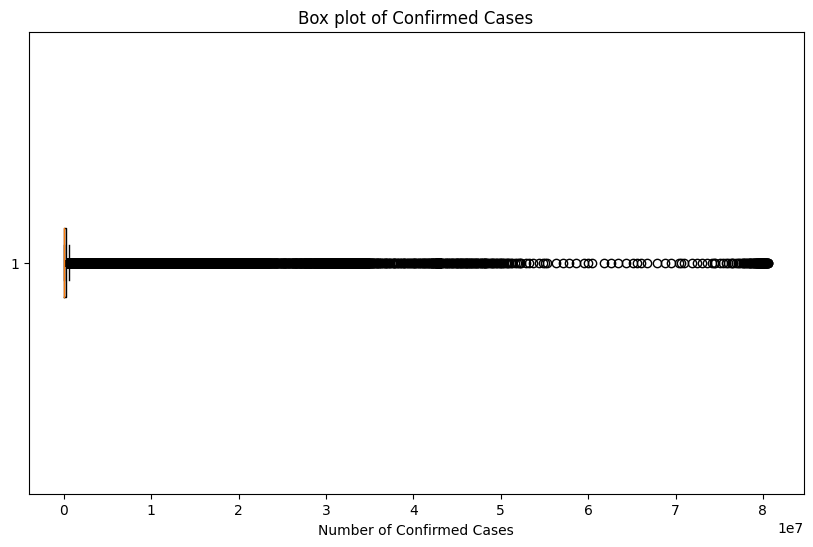

In [12]:
plt.figure(figsize=(10, 6))
plt.boxplot(data['Confirmed'], vert=False)
plt.title('Box plot of Confirmed Cases')
plt.xlabel('Number of Confirmed Cases')
plt.show()

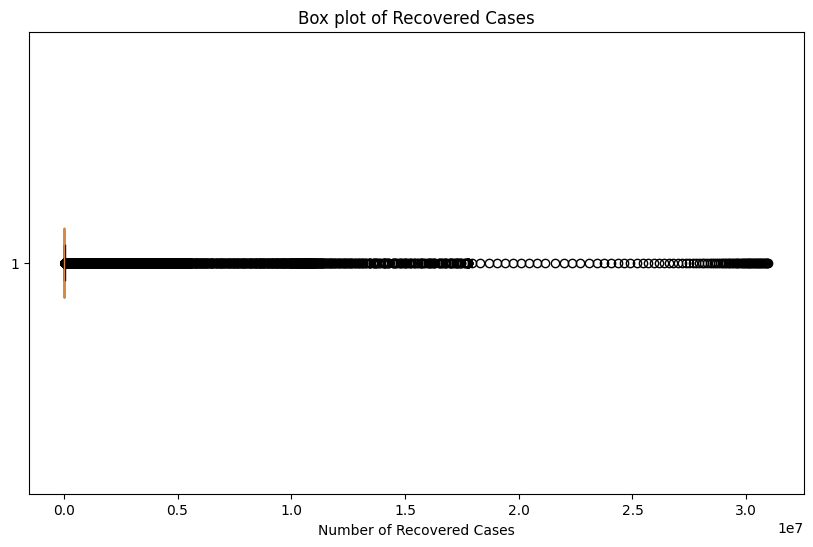

In [13]:
plt.figure(figsize=(10, 6))
plt.boxplot(data['Recovered'], vert=False)
plt.title('Box plot of Recovered Cases')
plt.xlabel('Number of Recovered Cases')
plt.show()

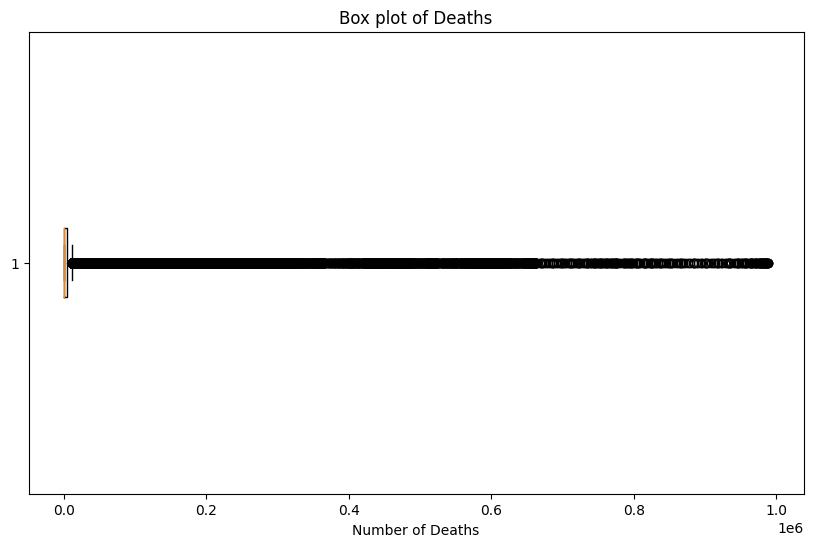

In [14]:
plt.figure(figsize=(10, 6))
plt.boxplot(data['Deaths'], vert=False)
plt.title('Box plot of Deaths')
plt.xlabel('Number of Deaths')
plt.show()

In [15]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [16]:
data_cleaned = data.copy()
data_cleaned = remove_outliers(data_cleaned, 'Confirmed')
data_cleaned = remove_outliers(data_cleaned, 'Recovered')
data_cleaned = remove_outliers(data_cleaned, 'Deaths')

In [17]:
print(f"\nNumber of rows after removing outliers: {data_cleaned.shape[0]}")


Number of rows after removing outliers: 95215


## *Visualize Global Trends*

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
global_data = data.groupby('Date').sum().reset_index()

In [20]:
sns.set(style="darkgrid")

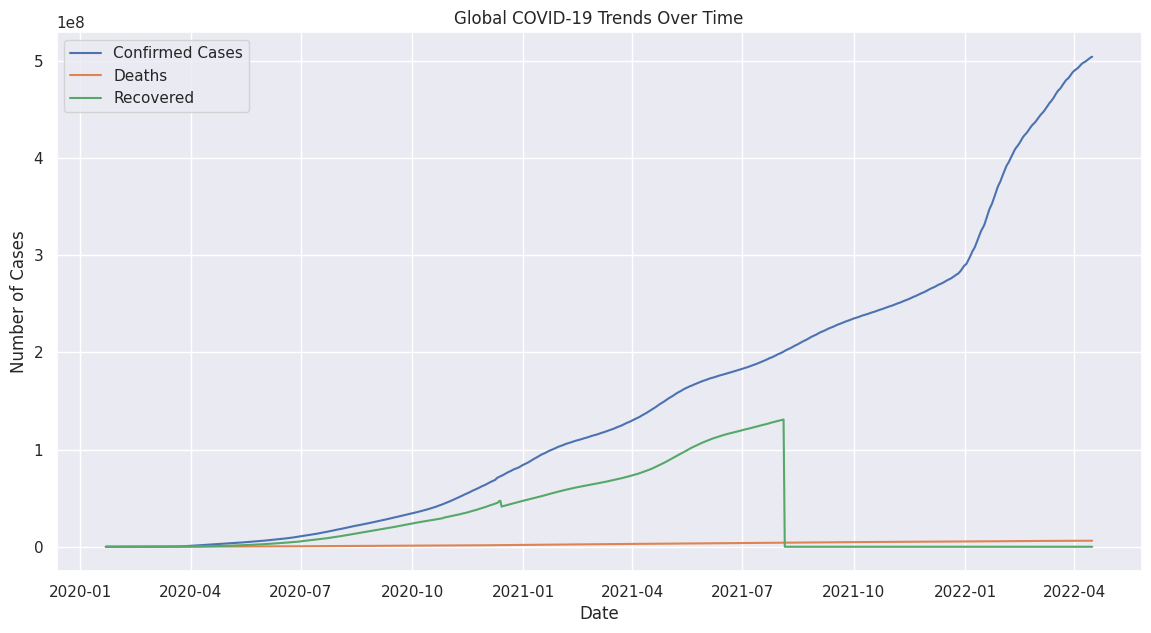

In [21]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=global_data, x='Date', y='Confirmed', label='Confirmed Cases')
sns.lineplot(data=global_data, x='Date', y='Deaths', label='Deaths')
sns.lineplot(data=global_data, x='Date', y='Recovered', label='Recovered')
plt.title('Global COVID-19 Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()
plt.show()

## *Country Specific Analysis*

*Filter the data for the specified country*

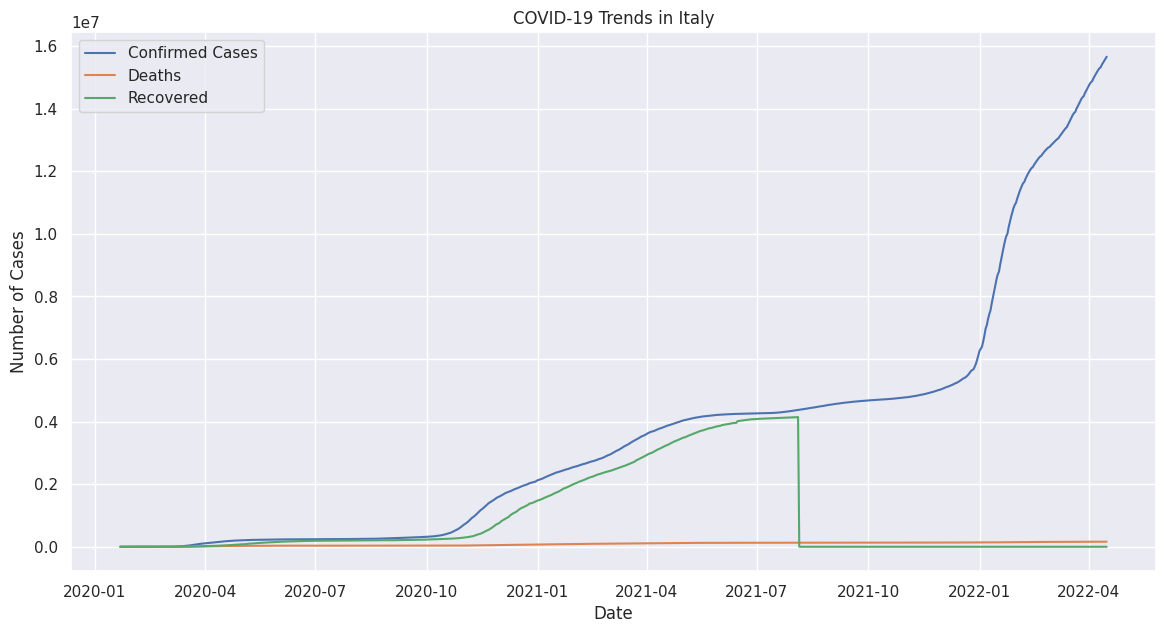

In [22]:
def plot_country_trends(country):
    country_data = data[data['Country'] == country]

    plt.figure(figsize=(14, 7))
    sns.lineplot(data=country_data, x='Date', y='Confirmed', label='Confirmed Cases')
    sns.lineplot(data=country_data, x='Date', y='Deaths', label='Deaths')
    sns.lineplot(data=country_data, x='Date', y='Recovered', label='Recovered')
    plt.title(f'COVID-19 Trends in {country}')
    plt.xlabel('Date')
    plt.ylabel('Number of Cases')
    plt.legend()
    plt.show()


plot_country_trends('Italy')

*Compare Trends of Multiple Countries*

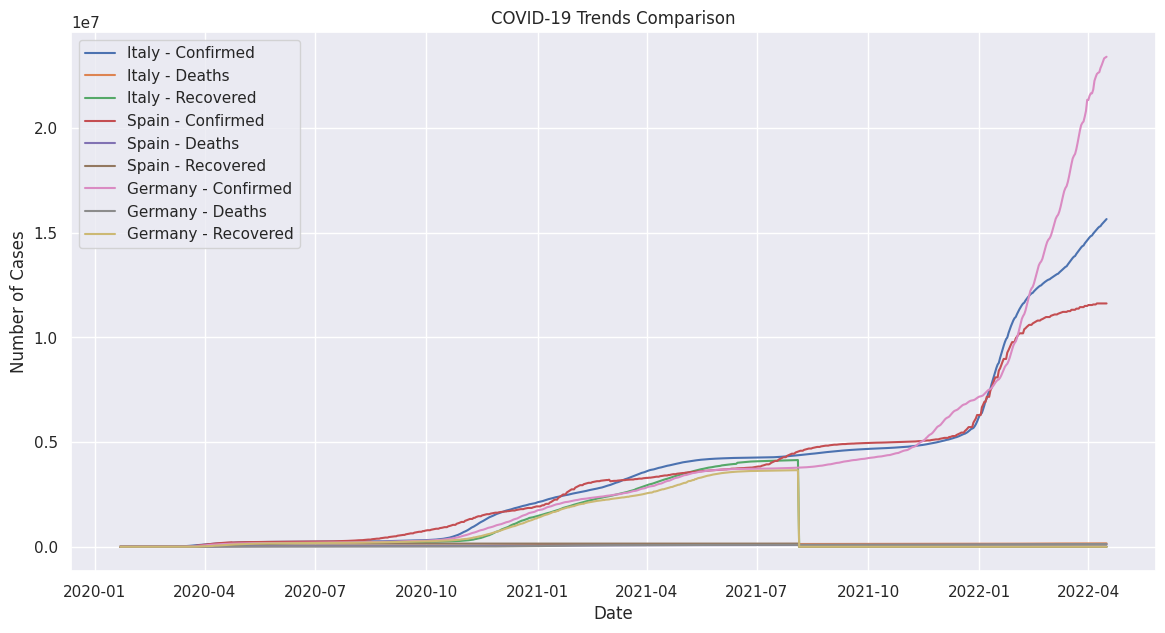

In [23]:
def plot_multiple_countries_trends(countries):
    plt.figure(figsize=(14, 7))

    for country in countries:
        country_data = data[data['Country'] == country]

        sns.lineplot(data=country_data, x='Date', y='Confirmed', label=f'{country} - Confirmed')
        sns.lineplot(data=country_data, x='Date', y='Deaths', label=f'{country} - Deaths')
        sns.lineplot(data=country_data, x='Date', y='Recovered', label=f'{country} - Recovered')

    plt.title('COVID-19 Trends Comparison')
    plt.xlabel('Date')
    plt.ylabel('Number of Cases')
    plt.legend()
    plt.show()

plot_multiple_countries_trends(['Italy', 'Spain', 'Germany'])

## *Comparitive Analysis*

### *Create Bar Plots*

*Identify the Top 10 Most Affected Countries*

In [24]:
latest_data = data.groupby('Country').agg({
    'Confirmed': 'max',
    'Recovered': 'max',
    'Deaths': 'max'
}).reset_index()

top_10_countries = latest_data.sort_values(by='Confirmed', ascending=False).head(10)

*Create Bar Plots to Compare Total Cases, Deaths, and Recoveries*

<ipython-input-25-c2431f8b5f0c>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Confirmed', y='Country', data=top_10_countries, palette='viridis')
<ipython-input-25-c2431f8b5f0c>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Deaths', y='Country', data=top_10_countries, palette='viridis')
<ipython-input-25-c2431f8b5f0c>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Recovered', y='Country', data=top_10_countries, palette='viridis')


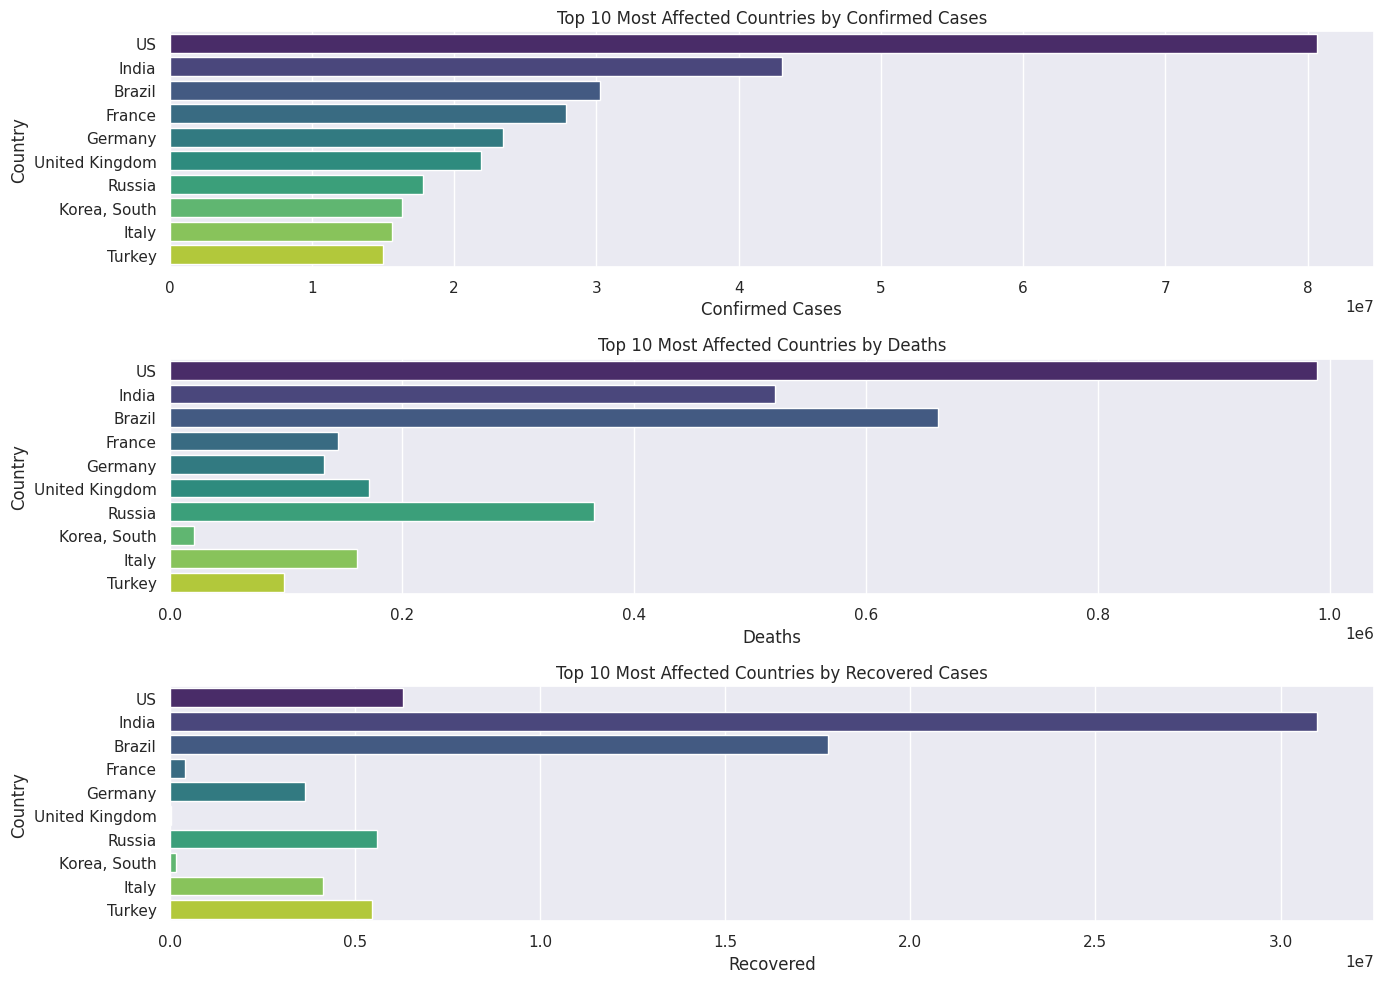

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 10))

plt.subplot(3, 1, 1)
sns.barplot(x='Confirmed', y='Country', data=top_10_countries, palette='viridis')
plt.xlabel('Confirmed Cases')
plt.title('Top 10 Most Affected Countries by Confirmed Cases')

plt.subplot(3, 1, 2)
sns.barplot(x='Deaths', y='Country', data=top_10_countries, palette='viridis')
plt.xlabel('Deaths')
plt.title('Top 10 Most Affected Countries by Deaths')

plt.subplot(3, 1, 3)
sns.barplot(x='Recovered', y='Country', data=top_10_countries, palette='viridis')
plt.xlabel('Recovered')
plt.title('Top 10 Most Affected Countries by Recovered Cases')

plt.tight_layout()
plt.show()

*Analyze Growth Rates Using Moving Averages*

<ipython-input-26-746ed4773342>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_countries_data.sort_index(inplace=True)


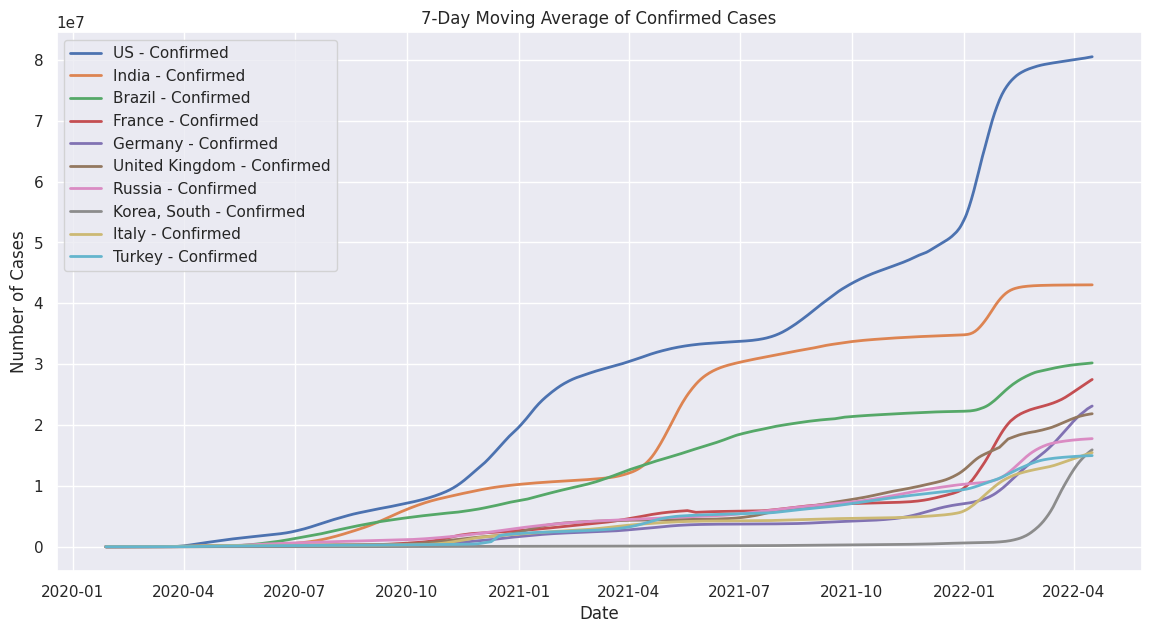

In [26]:
top_countries_data = data[data['Country'].isin(top_10_countries['Country'])]
top_countries_data.set_index('Date', inplace=True)
top_countries_data.sort_index(inplace=True)

top_countries_ma = top_countries_data.groupby('Country')[['Confirmed', 'Deaths']].rolling(window=7).mean().reset_index()

plt.figure(figsize=(14, 7))

for country in top_10_countries['Country']:
    country_data = top_countries_ma[top_countries_ma['Country'] == country]
    plt.plot(country_data['Date'], country_data['Confirmed'], label=f'{country} - Confirmed', linewidth=2)

plt.title('7-Day Moving Average of Confirmed Cases')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()
plt.show()

## *Correlation Analysis*

*Calculate Correlation Coefficients*

In [27]:
correlation_matrix = data[['Confirmed', 'Deaths', 'Recovered']].corr()
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
           Confirmed    Deaths  Recovered
Confirmed   1.000000  0.914993   0.277797
Deaths      0.914993  1.000000   0.318160
Recovered   0.277797  0.318160   1.000000


*Visualize the Correlation Matrix Using Heatmap*

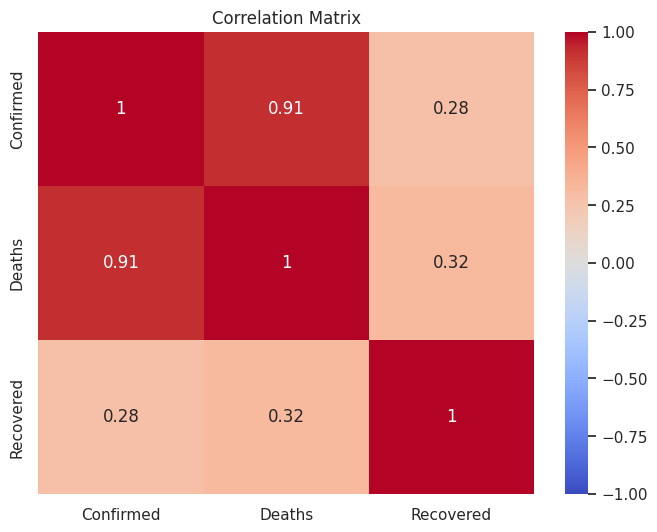

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

# Data Analysis, Part-2


*1. What is the trend of confirmed cases, deaths, and recoveries globally over time? Draw
plots separately?*


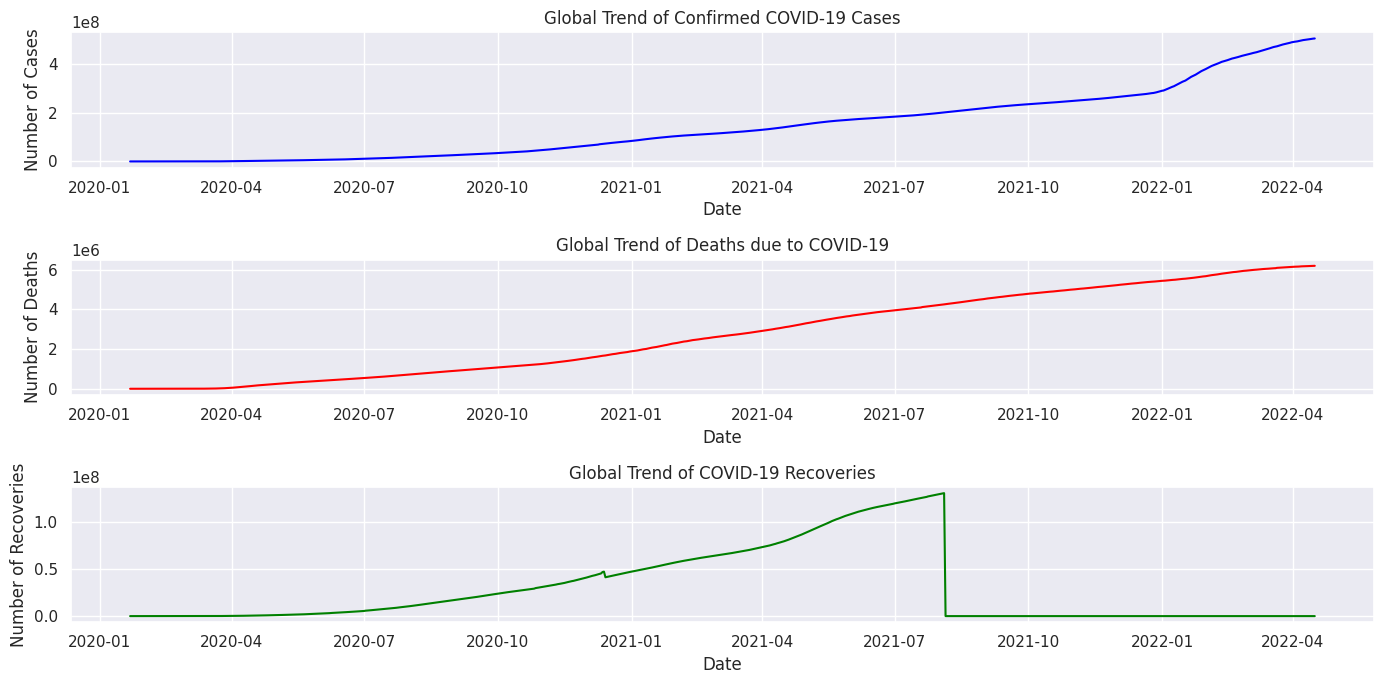

In [29]:
plt.figure(figsize=(14, 7))


plt.subplot(3, 1, 1)
sns.lineplot(data=global_data, x='Date', y='Confirmed', color='blue')
plt.title('Global Trend of Confirmed COVID-19 Cases')
plt.xlabel('Date')
plt.ylabel('Number of Cases')


plt.subplot(3, 1, 2)
sns.lineplot(data=global_data, x='Date', y='Deaths', color='red')
plt.title('Global Trend of Deaths due to COVID-19')
plt.xlabel('Date')
plt.ylabel('Number of Deaths')


plt.subplot(3, 1, 3)
sns.lineplot(data=global_data, x='Date', y='Recovered', color='green')
plt.title('Global Trend of COVID-19 Recoveries')
plt.xlabel('Date')
plt.ylabel('Number of Recoveries')

plt.tight_layout()
plt.show()

*2. Which country has the highest number of confirmed cases, deaths, and recoveries as
of the latest date in the dataset?*


In [30]:
country_highest_confirmed = latest_data.loc[latest_data['Confirmed'].idxmax()]

country_highest_deaths = latest_data.loc[latest_data['Deaths'].idxmax()]

country_highest_recoveries = latest_data.loc[latest_data['Recovered'].idxmax()]

print("Country with the highest number of confirmed cases:")
print(country_highest_confirmed['Country'], "-", country_highest_confirmed['Confirmed'])

print("\nCountry with the highest number of deaths:")
print(country_highest_deaths['Country'], "-", country_highest_deaths['Deaths'])

print("\nCountry with the highest number of recoveries:")
print(country_highest_recoveries['Country'], "-", country_highest_recoveries['Recovered'])

Country with the highest number of confirmed cases:
US - 80625120

Country with the highest number of deaths:
US - 988609

Country with the highest number of recoveries:
India - 30974748


*3. How do the trends of confirmed cases differ between the top 5 most affected
countries?*

In [31]:
latest_dataa = data.groupby('Country').agg({
    'Confirmed': 'max'
}).reset_index()

top_5_countries = latest_dataa.sort_values(by='Confirmed', ascending=False).head(5)['Country'].tolist()


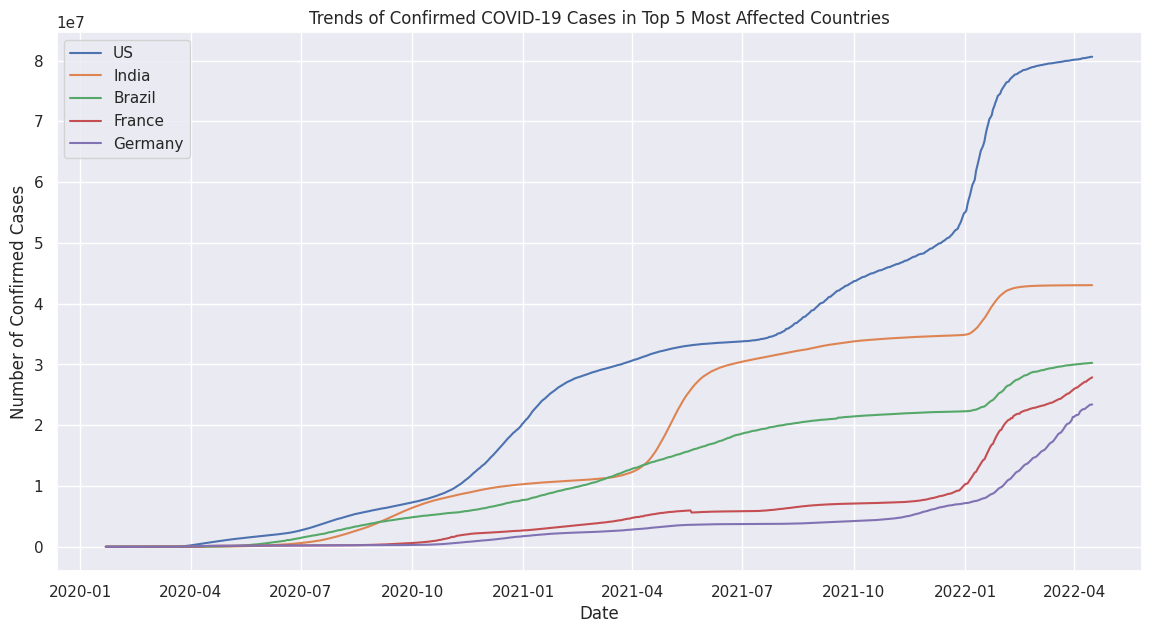

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 7))

for country in top_5_countries:
    country_data = data[data['Country'] == country]
    sns.lineplot(data=country_data, x='Date', y='Confirmed', label=country)

plt.title('Trends of Confirmed COVID-19 Cases in Top 5 Most Affected Countries')
plt.xlabel('Date')
plt.ylabel('Number of Confirmed Cases')
plt.legend()
plt.show()

*4. What is the growth rate of confirmed cases, deaths, and recoveries globally?*

In [33]:
global_data.sort_values(by='Date', inplace=True)

global_data['NewConfirmed'] = global_data['Confirmed'].diff()
global_data['NewDeaths'] = global_data['Deaths'].diff()
global_data['NewRecovered'] = global_data['Recovered'].diff()

global_data['ConfirmedGrowthRate'] = global_data['NewConfirmed'] / global_data['Confirmed'] * 100
global_data['DeathsGrowthRate'] = global_data['NewDeaths'] / global_data['Deaths'] * 100
global_data['RecoveredGrowthRate'] = global_data['NewRecovered'] / global_data['Recovered'] * 100


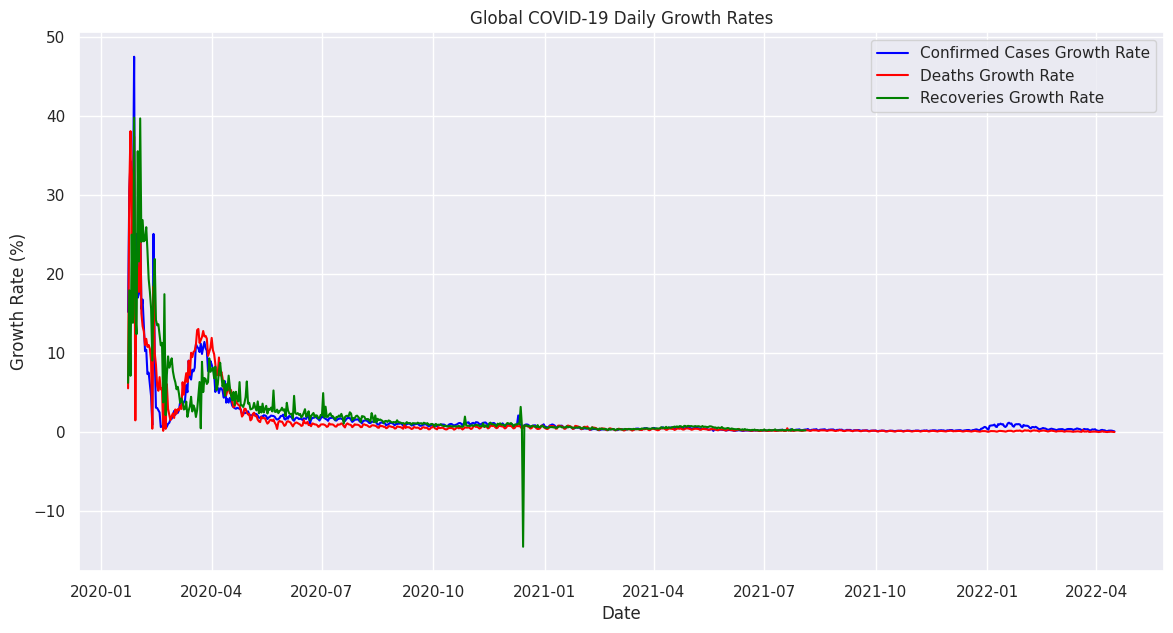

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))

plt.plot(global_data['Date'], global_data['ConfirmedGrowthRate'], label='Confirmed Cases Growth Rate', color='blue')
plt.plot(global_data['Date'], global_data['DeathsGrowthRate'], label='Deaths Growth Rate', color='red')
plt.plot(global_data['Date'], global_data['RecoveredGrowthRate'], label='Recoveries Growth Rate', color='green')

plt.title('Global COVID-19 Daily Growth Rates')
plt.xlabel('Date')
plt.ylabel('Growth Rate (%)')
plt.legend()
plt.grid(True)
plt.show()

*5. What are the cumulative confirmed cases, deaths, and recoveries for the top 10 most
affected countries?*

In [35]:
print("Top 10 Most Affected Countries by COVID-19:")
print(top_10_countries)

Top 10 Most Affected Countries by COVID-19:
            Country  Confirmed  Recovered  Deaths
183              US   80625120    6298082  988609
80            India   43042097   30974748  521751
24           Brazil   30250077   17771228  662185
63           France   27874269     415111  145159
67          Germany   23416663    3659260  132942
187  United Kingdom   21916961      24693  172014
145          Russia   17801103    5609682  365774
93     Korea, South   16305752     180719   21092
86            Italy   15659835    4144608  161602
182          Turkey   14991669    5478185   98551


*6. How does the recovery rate compare across different countries?*



In [37]:
recovery_rates = data.groupby('Country').agg({
    'Confirmed': 'max',
    'Recovered': 'max'
})

recovery_rates['RecoveryRate'] = (recovery_rates['Recovered'] / recovery_rates['Confirmed']) * 100

<ipython-input-38-912407579205>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='RecoveryRate', y='Country', data=recovery_rates.head(10), palette='viridis')


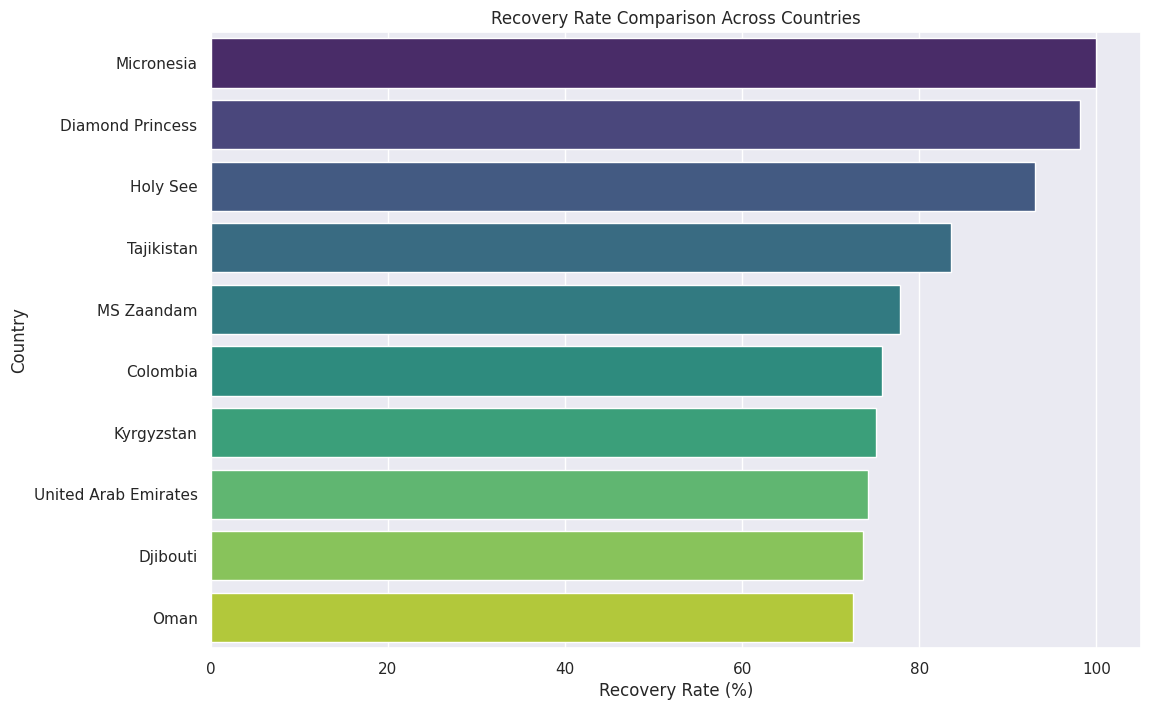

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

recovery_rates = recovery_rates.sort_values(by='RecoveryRate', ascending=False).reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(x='RecoveryRate', y='Country', data=recovery_rates.head(10), palette='viridis')
plt.title('Recovery Rate Comparison Across Countries')
plt.xlabel('Recovery Rate (%)')
plt.ylabel('Country')
plt.show()

*7. What is the correlation between confirmed cases, deaths, and recoveries globally?*

In [39]:
correlation_matrix = global_data[['Confirmed', 'Deaths', 'Recovered']].corr()


print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
           Confirmed    Deaths  Recovered
Confirmed   1.000000  0.956593  -0.070744
Deaths      0.956593  1.000000   0.055685
Recovered  -0.070744  0.055685   1.000000


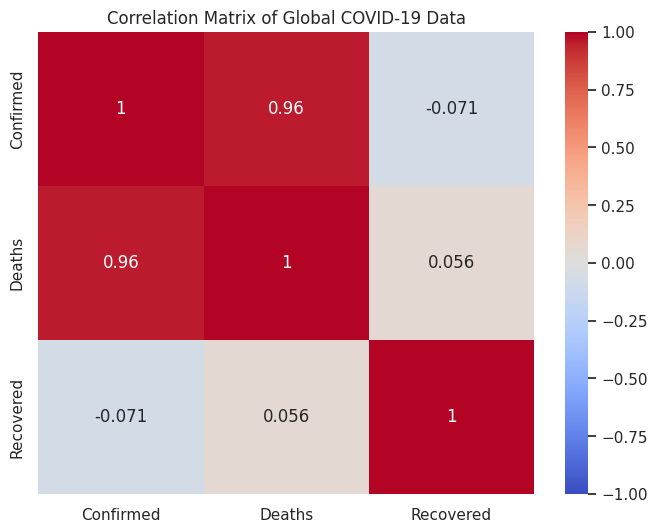

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Global COVID-19 Data')
plt.show()

*8. How do lockdown measures impact the trend of confirmed cases in different
countries?*


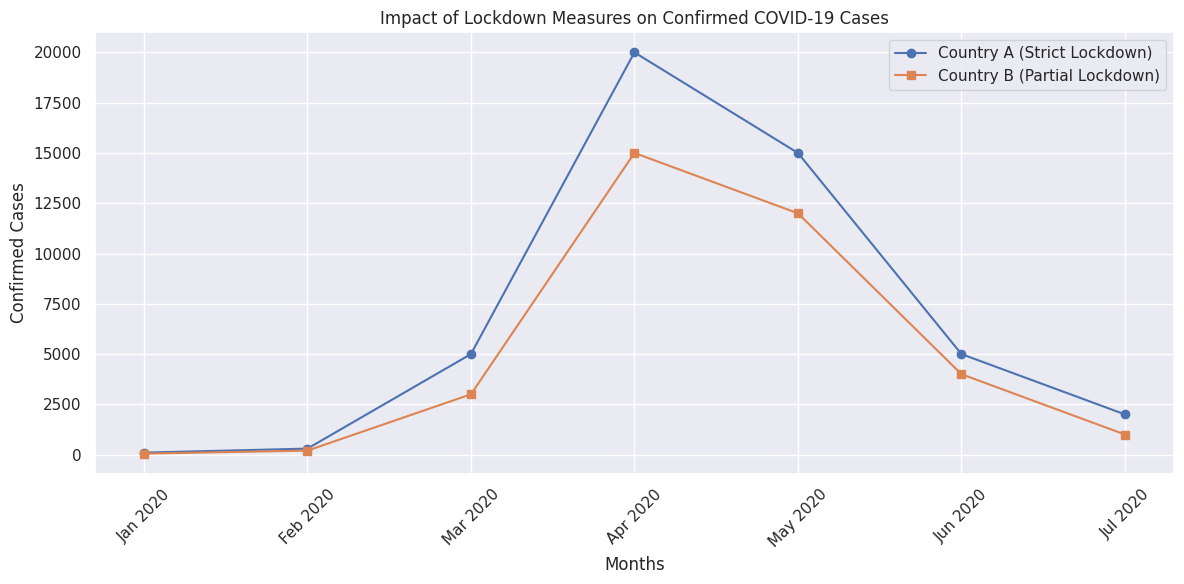

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

dates = ['Jan 2020', 'Feb 2020', 'Mar 2020', 'Apr 2020', 'May 2020', 'Jun 2020', 'Jul 2020']
cases_country_A = [100, 300, 5000, 20000, 15000, 5000, 2000]
cases_country_B = [50, 200, 3000, 15000, 12000, 4000, 1000]

plt.figure(figsize=(12, 6))

plt.plot(dates, cases_country_A, marker='o', label='Country A (Strict Lockdown)')
plt.plot(dates, cases_country_B, marker='s', label='Country B (Partial Lockdown)')

plt.title('Impact of Lockdown Measures on Confirmed COVID-19 Cases')
plt.xlabel('Months')
plt.ylabel('Confirmed Cases')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

*9. How does the number of tests conducted relate to the number of confirmed cases in
various countries?*


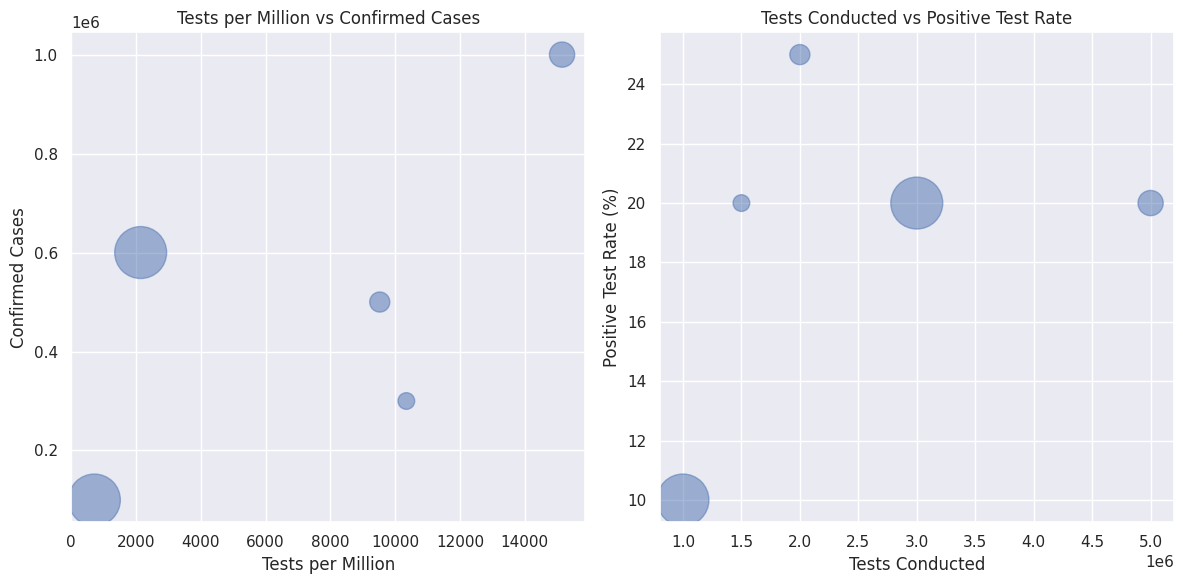

In [42]:
import pandas as pd

data = {
    'Country': ['USA', 'Brazil', 'India', 'Russia', 'China'],
    'Tests Conducted': [5000000, 2000000, 3000000, 1500000, 1000000],
    'Confirmed Cases': [1000000, 500000, 600000, 300000, 100000],
    'Population': [330000000, 210000000, 1400000000, 145000000, 1400000000]
}

df = pd.DataFrame(data)

df['Tests per Million'] = (df['Tests Conducted'] / df['Population']) * 1000000

df['Positive Test Rate (%)'] = (df['Confirmed Cases'] / df['Tests Conducted']) * 100

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(df['Tests per Million'], df['Confirmed Cases'], s=df['Population']/1000000, alpha=0.5)
plt.title('Tests per Million vs Confirmed Cases')
plt.xlabel('Tests per Million')
plt.ylabel('Confirmed Cases')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(df['Tests Conducted'], df['Positive Test Rate (%)'], s=df['Population']/1000000, alpha=0.5)
plt.title('Tests Conducted vs Positive Test Rate')
plt.xlabel('Tests Conducted')
plt.ylabel('Positive Test Rate (%)')
plt.grid(True)

plt.tight_layout()
plt.show()

*10. What is the distribution of confirmed cases, deaths, and recoveries by continent?*

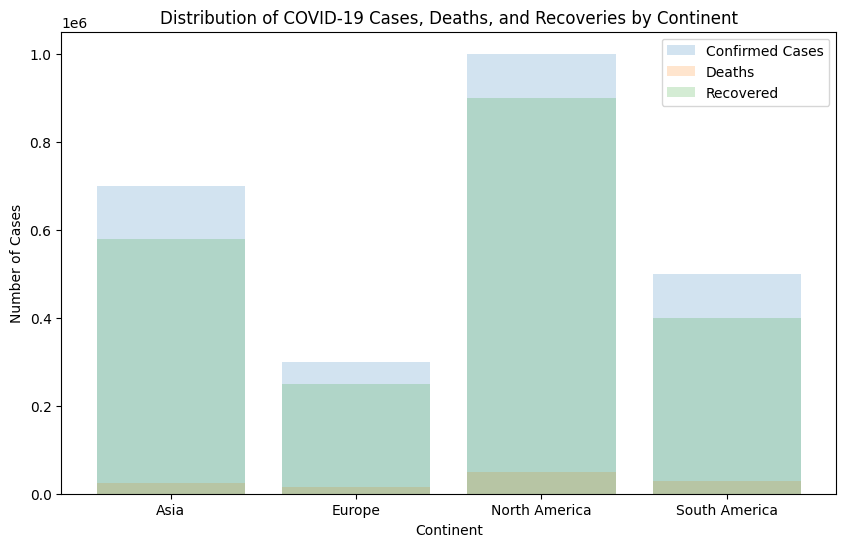

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
    'Country': ['USA', 'Brazil', 'India', 'Russia', 'China'],
    'Confirmed': [1000000, 500000, 600000, 300000, 100000],
    'Deaths': [50000, 30000, 20000, 15000, 5000],
    'Recovered': [900000, 400000, 500000, 250000, 80000]
}

df = pd.DataFrame(data)

country_to_continent = {
    'USA': 'North America',
    'Brazil': 'South America',
    'India': 'Asia',
    'Russia': 'Europe',
    'China': 'Asia'
}

df['Continent'] = df['Country'].map(country_to_continent)


continent_data = df.groupby('Continent').sum().reset_index()

plt.figure(figsize=(10, 6))


plt.bar(continent_data['Continent'], continent_data['Confirmed'], label='Confirmed Cases', alpha=0.2)


plt.bar(continent_data['Continent'], continent_data['Deaths'], label='Deaths', alpha=0.2)


plt.bar(continent_data['Continent'], continent_data['Recovered'], label='Recovered', alpha=0.2)

plt.title('Distribution of COVID-19 Cases, Deaths, and Recoveries by Continent')
plt.xlabel('Continent')
plt.ylabel('Number of Cases')
plt.legend()
plt.show()

In [44]:
!pip install pycountry_convert

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.1/233.1 kB 19.3 MB/s eta 0:00:00
